## Task 3: Exploratory Data Analysis - Retail
### Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.This task is about Exploratory Data Analysis - Retail where the task focuses on a business manager who will try to find out weak areas where he can work to make more profit.

### Created By : HARSH

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the CSV
df = pd.read_csv("SampleSuperstore.csv")

In [3]:
#Display top 5 rows
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#display summary
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
#checking null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
#Information about the duplicate values
df.duplicated().sum()

17

In [7]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
#Converting postal code data type int to object
df['Postal Code'] = df['Postal Code'].astype('object')

In [9]:
#Dropping dupicate values
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.duplicated().sum()

0

In [10]:
#Checking Correlation 
corr = df.corr()
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


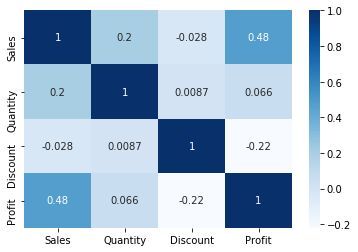

In [11]:
sns.heatmap(corr,annot=True,cmap='Blues')

In [12]:
#dropping postal code columns
df = df.drop(['Postal Code'],axis = 1) 

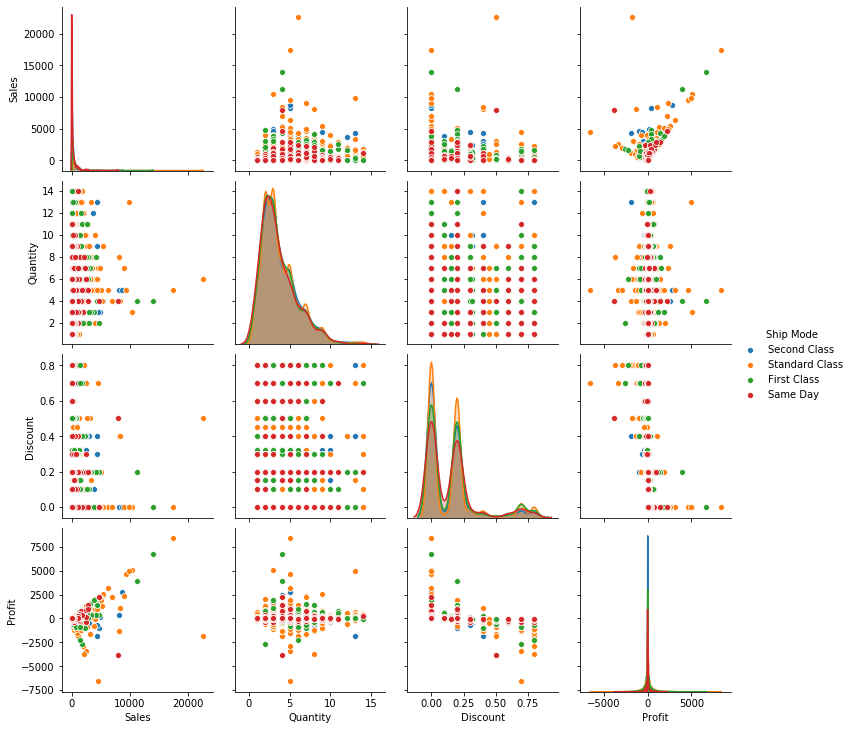

In [13]:
sns.pairplot(df, hue='Ship Mode')

In [14]:
 #value counts for ship mode
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

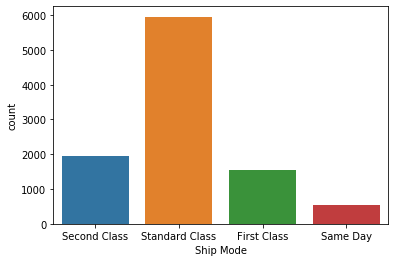

In [15]:
sns.countplot(x=df['Ship Mode'])

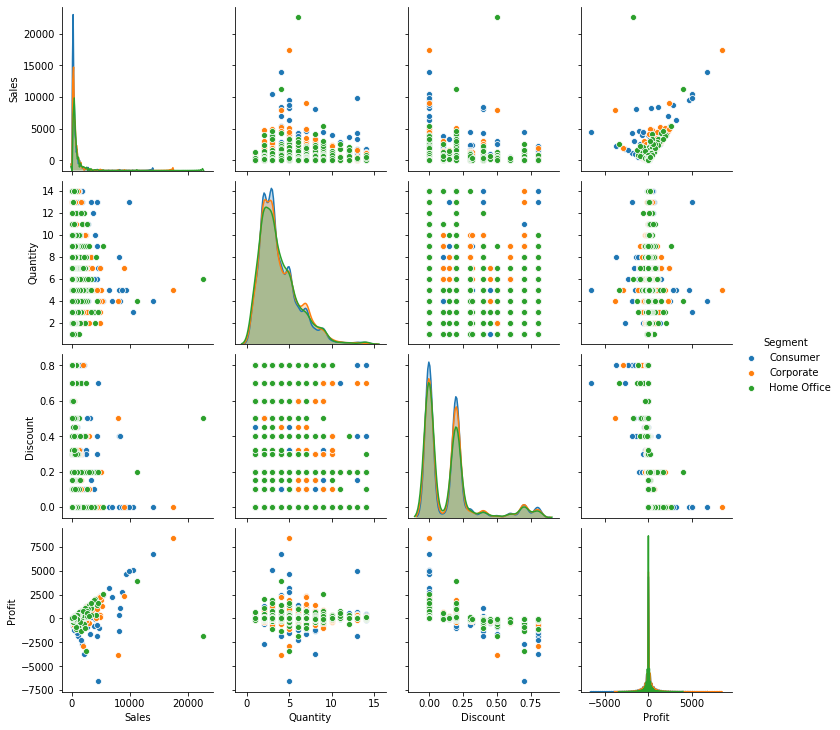

In [16]:
sns.pairplot(df, hue='Segment')

In [17]:
#valuecounts for segment
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

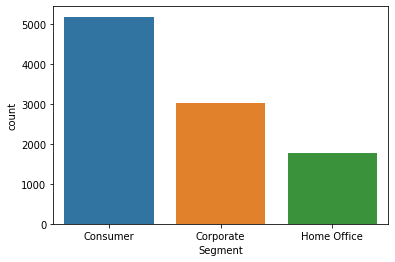

In [18]:
sns.countplot(x=df['Segment'])

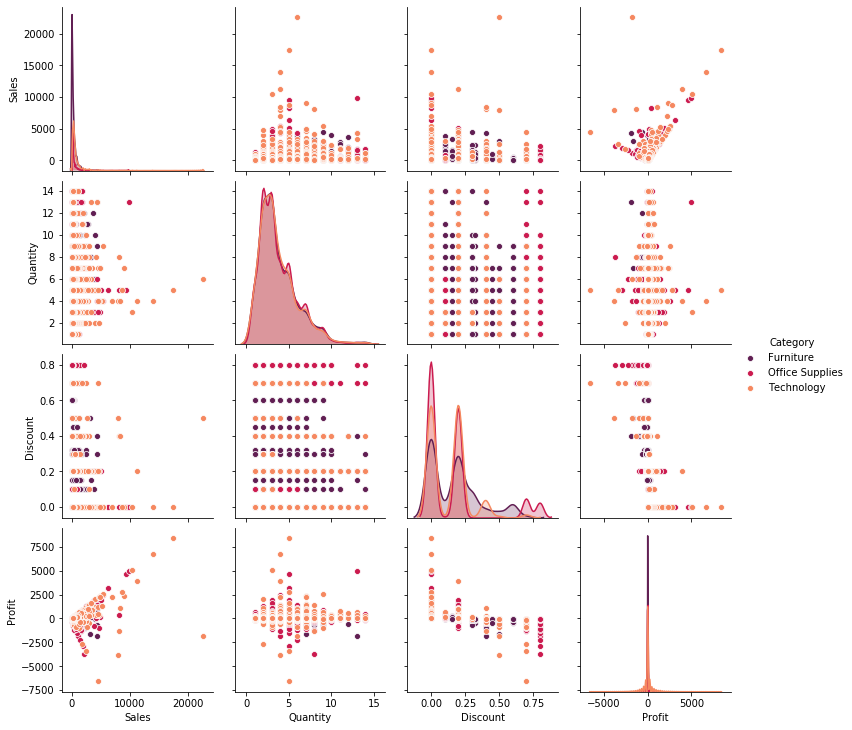

In [19]:
#plotting pair plot
sns.pairplot(df,hue='Category', palette='rocket')

In [20]:
#valuecounts for Category
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

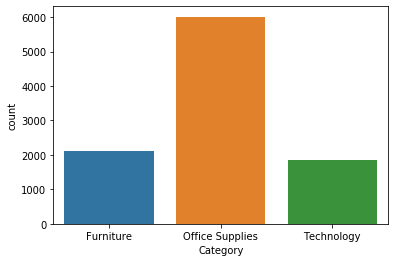

In [21]:
#plotting count plot
sns.countplot(x=df['Category'])

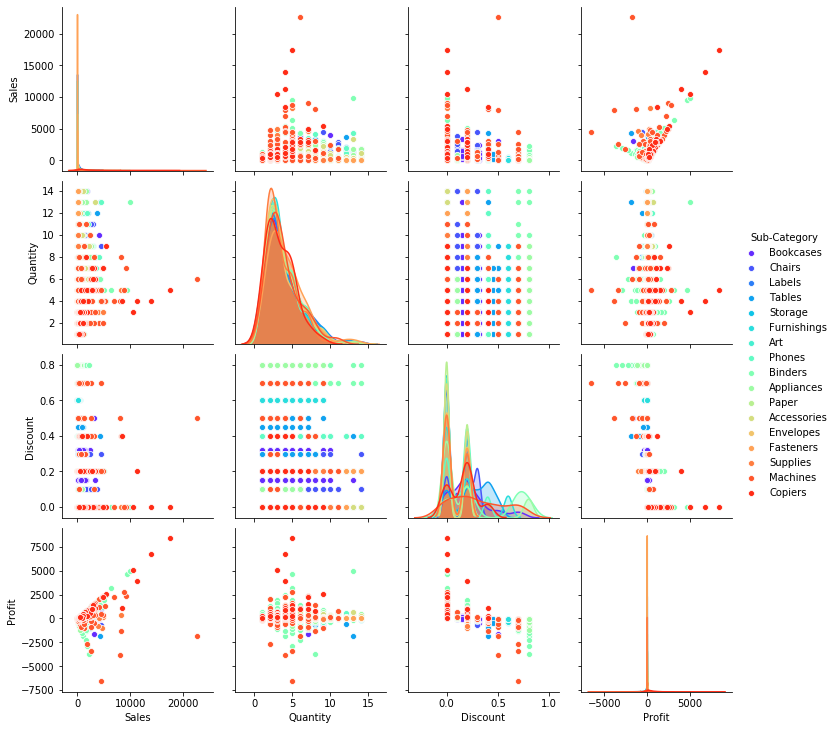

In [22]:
#plotting pair plot
sns.pairplot(df,hue='Sub-Category', palette='rainbow')

In [23]:
#value counts for sub-category
data=df['Sub-Category'].value_counts()

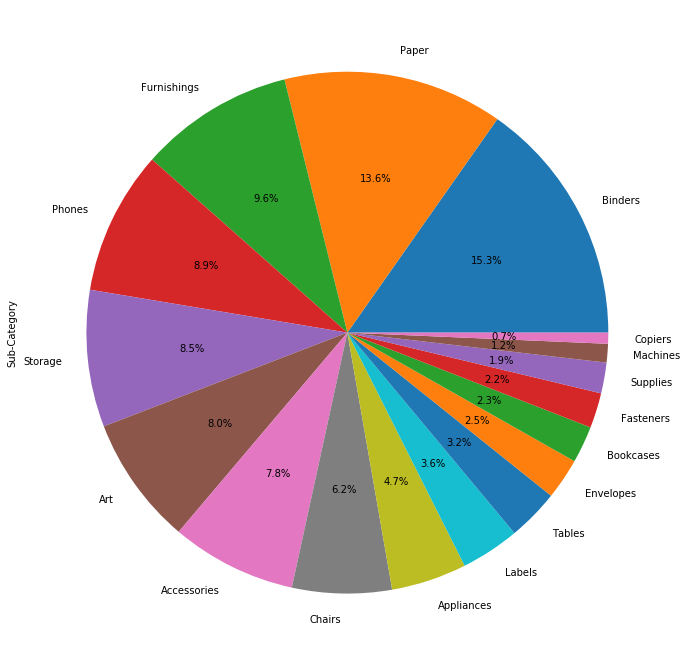

In [24]:
# plotting pie chart
plt.figure(figsize=(15,12))
df['Sub-Category'].value_counts().plot.pie(autopct='%.1f%%', )
plt.show()

### Observation 1: Maximum are blinders, paper and furnishings while Cooper machines, suppliers and Fastners are the least

In [25]:
#valuecounts for states
df['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

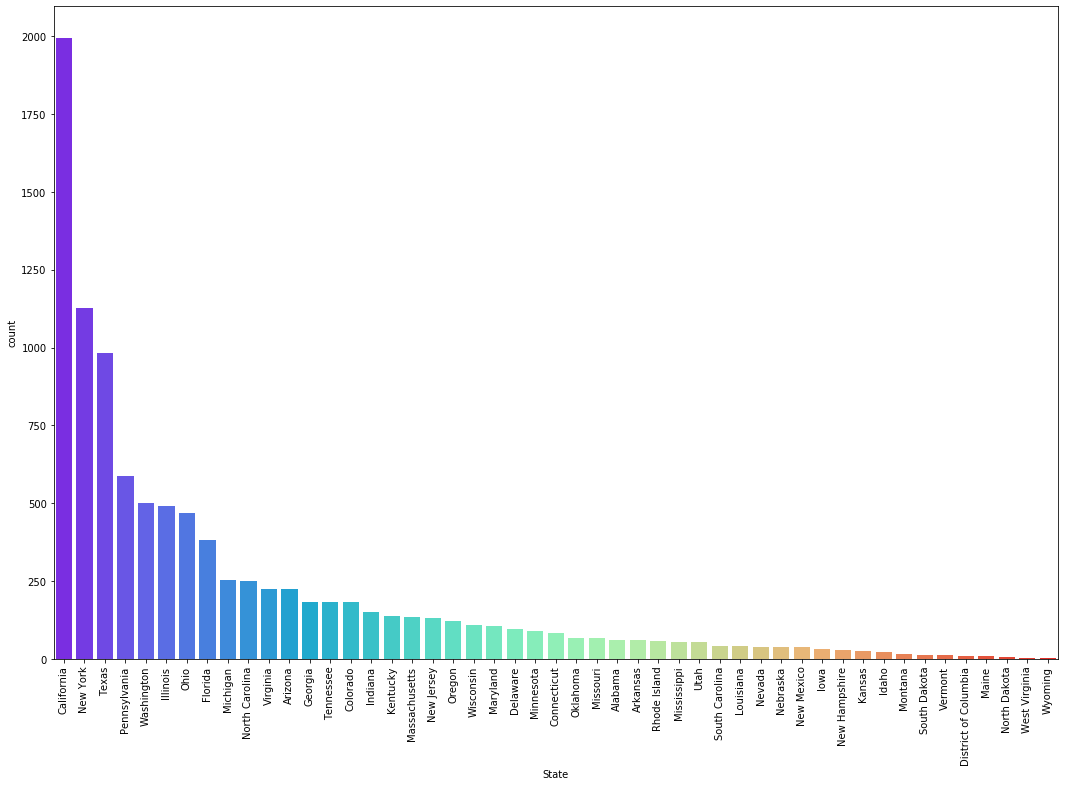

In [26]:
#plotting count plot
plt.figure(figsize=(18,12))
sns.countplot(x='State',data=df,palette='rainbow',order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


### Observation 2: Max Buyers are from California & New York while min buyers from the state of West Virginia and Wyoming

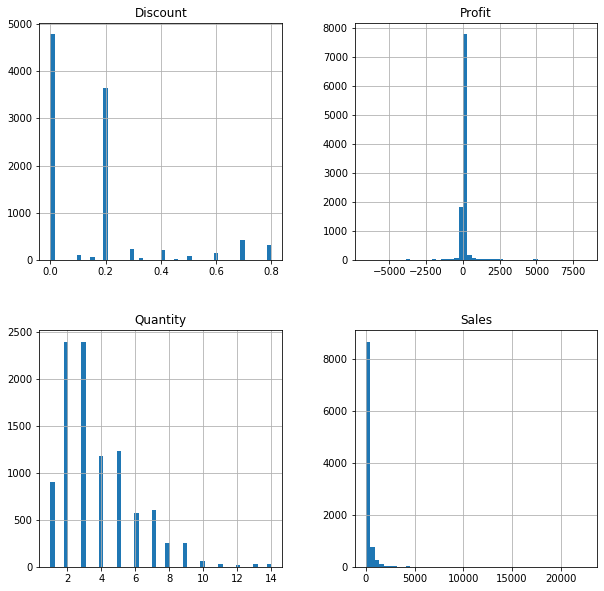

In [27]:
#plotting histogram
df.hist(figsize=(10,10),bins=50)
plt.show()

### Observation 3:
### Max customers tends to buy the quantity 2 and 3 while they are not interested in buying quantity 12 and 14
### Most of the customers are getting the discount between 0 to 20 percent
    

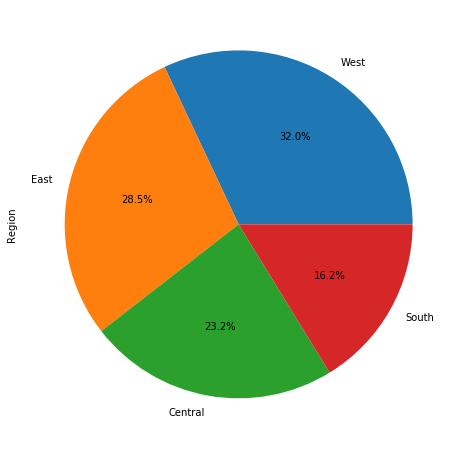

In [28]:
#plotting pie chart
plt.figure(figsize=(10,8))
df['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

### Observation 4:Most of the customers belongs to West region while least belongs from the South Region

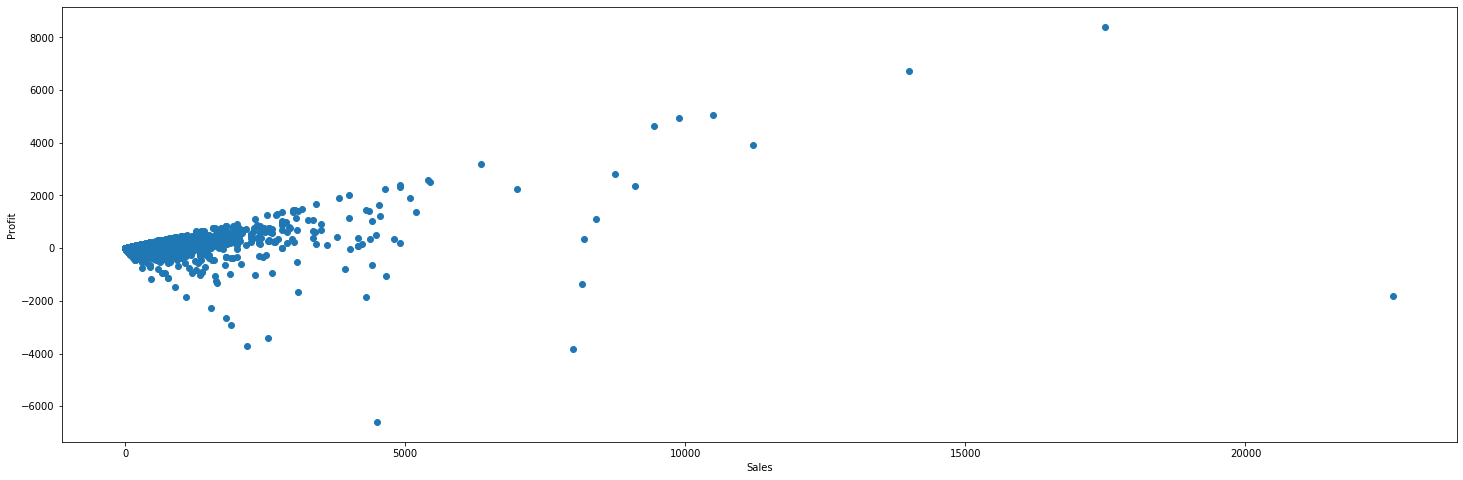

In [29]:
#plotting scatter plot
fig,ax=plt.subplots(figsize=(25,8))
ax.scatter(df['Sales'],df['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()


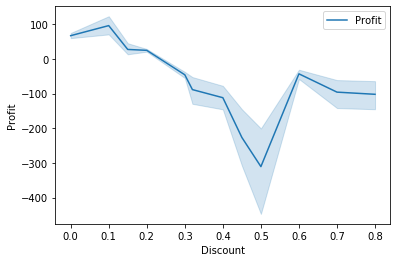

In [30]:
#plotting line plot
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

### Observation 5: There is no correlation between Profit & Discount

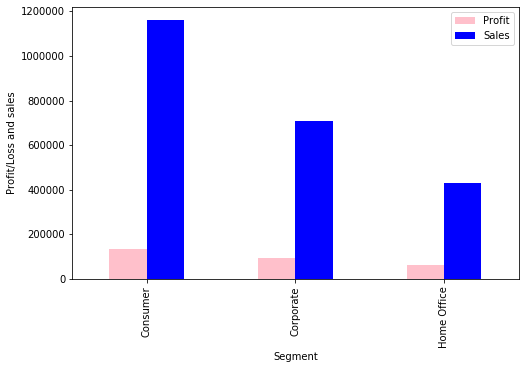

In [31]:
# plotting bar
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['pink','blue'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

### Observation 6: Profit & sales are max in Consumer Segment and min in Home Office Segment 

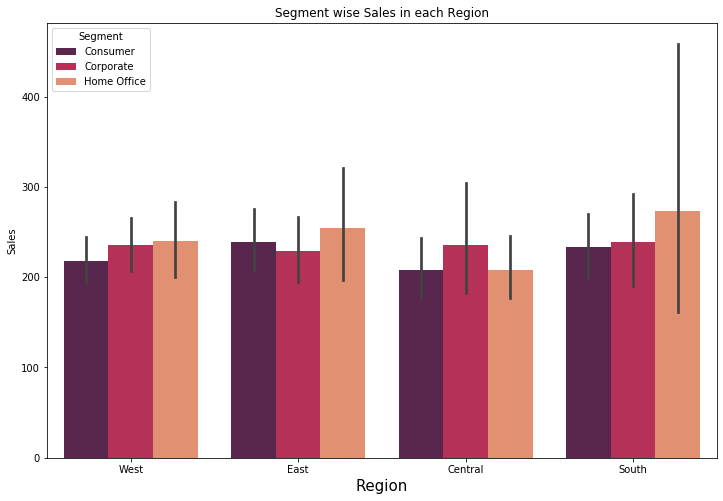

In [32]:
#plotting bar plot
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()


### Observation 7: Segment wise sales in all the region are almost similar

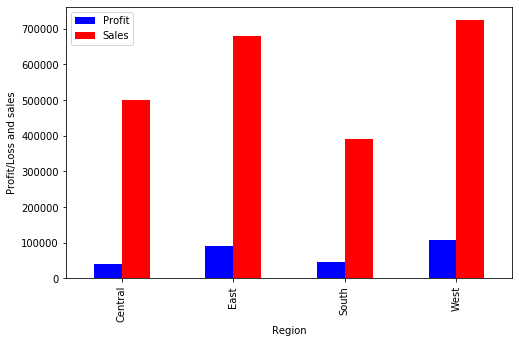

In [33]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['blue','red'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

### Observation 8: Profit & sales are max in West Region while min in South Region

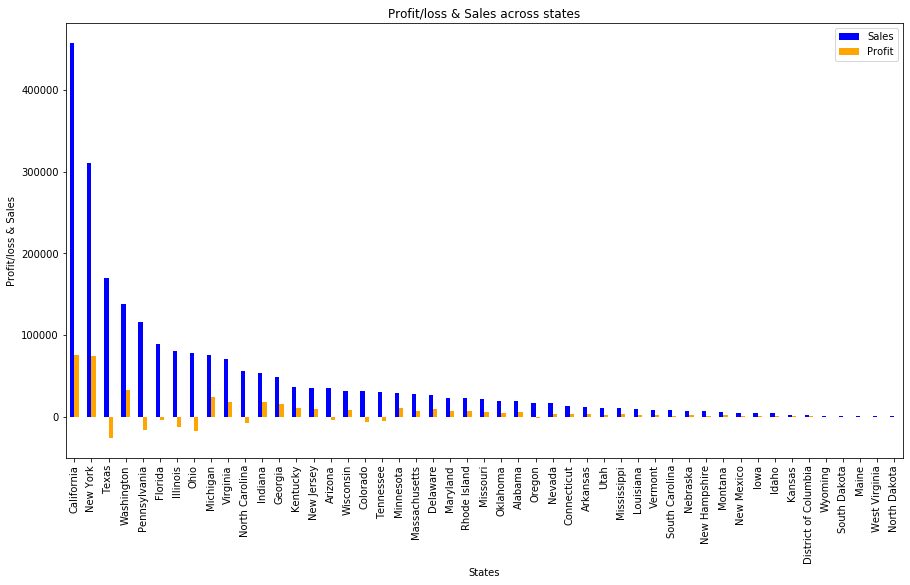

In [34]:
#plotting bar plot
ps = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['blue','orange'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()


### Observation 9: Max Profit in the state of California, New York while Max loss in Texas, pennsylvania, Ohio state

In [35]:
t_states = df['State'].value_counts().nlargest(10)
t_states

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

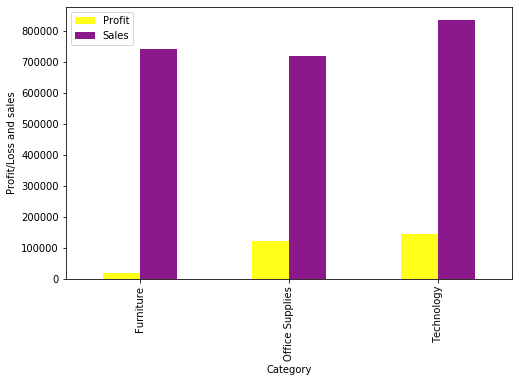

In [36]:
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['yellow','purple'],alpha=0.9,figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

### Observation 10:As a business manager, try to find out the weak areas where you can work to make more profit?
  #### Technology and Office Supplies have high profit.
  #### Furniture have less profit

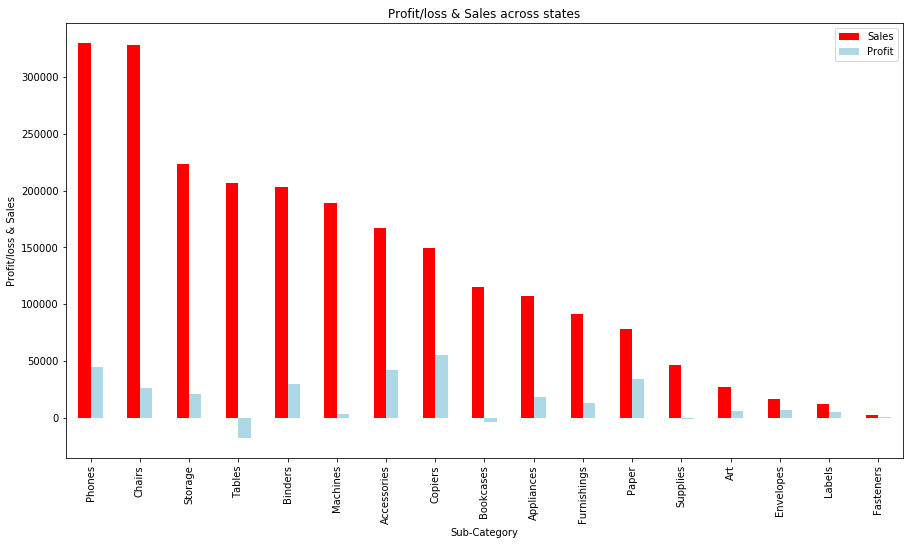

In [37]:
ps = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['red','lightblue'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()


### Observation 11:
#### Phones sub-category have high sales.
#### Chairs have high sales but less profit compared to phones
#### Tables and Bookmarks sub-categories facing huge loss